In [1]:
df_train = pd.read_csv("train.csv", parse_dates=['Dates'])

In [2]:
df_test = pd.read_csv("test.csv", parse_dates=['Dates'])

In [3]:
df_train.tail()

Dates                Category  \
878044 2003-01-06 00:15:00                 ROBBERY   
878045 2003-01-06 00:01:00           LARCENY/THEFT   
878046 2003-01-06 00:01:00           LARCENY/THEFT   
878047 2003-01-06 00:01:00               VANDALISM   
878048 2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript DayOfWeek PdDistrict  \
878044           ROBBERY ON THE STREET WITH A GUN    Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO    Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO    Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)    Monday    BAYVIEW   

       Resolution                     Address           X          Y  
878044       NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045       NONE        600 Block of EDNA ST -122.447364  37.731948  
878046       NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047       NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048       NONE    1800 Block of NEWCOMB AV -122.394926  37.738212

In [4]:
df_test.tail()

Id               Dates  DayOfWeek PdDistrict  \
884257  884257 2003-01-01 00:01:00  Wednesday    MISSION   
884258  884258 2003-01-01 00:01:00  Wednesday   NORTHERN   
884259  884259 2003-01-01 00:01:00  Wednesday  INGLESIDE   
884260  884260 2003-01-01 00:01:00  Wednesday    BAYVIEW   
884261  884261 2003-01-01 00:01:00  Wednesday    TARAVAL   

                            Address           X          Y  
884257      2600 Block of BRYANT ST -122.408983  37.751987  
884258  1900 Block of WASHINGTON ST -122.425342  37.792681  
884259     5500 Block of MISSION ST -122.445418  37.712075  
884260      1500 Block of HUDSON AV -122.387394  37.739479  
884261       1500 Block of SLOAT BL -122.489714  37.733950

In [5]:
df_test['event'] = 1

In [6]:
df_train.PdDistrict.nunique(), df_test.PdDistrict.nunique()

(10, 10)

In [7]:
df_train[df_train.Address == '1500 Block of SLOAT BL'].size

4518

test데이터에 Descript, Resolution column이 없으므로 train에서 Descript, Resolution column 제거 

##### Drop Descript, Resolution in train

In [8]:
df_train.drop(columns=['Descript','Resolution'],inplace=True)

## 2. Feature Extraction
- 시간 : year, month, hour column 추출
- 공간 : isIntersection, isStreet, isBlock 추출
- event : 1 추가

In [9]:
df_train['year'] = df_train['Dates'].map(lambda x: x.year)
df_train['month'] = df_train['Dates'].map(lambda x: x.month)
df_train['hour'] = df_train['Dates'].map(lambda x: x.hour)

In [10]:
df_train.drop(columns='Dates', inplace=True)
df_train.tail()

Category DayOfWeek PdDistrict  \
878044                 ROBBERY    Monday    TARAVAL   
878045           LARCENY/THEFT    Monday  INGLESIDE   
878046           LARCENY/THEFT    Monday   SOUTHERN   
878047               VANDALISM    Monday   SOUTHERN   
878048  FORGERY/COUNTERFEITING    Monday    BAYVIEW   

                           Address           X          Y  year  month  hour  
878044  FARALLONES ST / CAPITOL AV -122.459033  37.714056  2003      1     0  
878045        600 Block of EDNA ST -122.447364  37.731948  2003      1     0  
878046          5TH ST / FOLSOM ST -122.403390  37.780266  2003      1     0  
878047        TOWNSEND ST / 2ND ST -122.390531  37.780607  2003      1     0  
878048    1800 Block of NEWCOMB AV -122.394926  37.738212  2003      1     0

In [11]:
df = df_train.copy()

In [12]:
# 앞뒤가 뒤바뀐 주소가 존재한다.
print(df[df.Address == "OAK ST / LAGUNA ST"].size)
print(df[df.Address == "LAGUNA ST / OAK ST"].size)

405
243


In [13]:
# 중복된 주소 제거해보자
# 1. Address에서 '/'를 포함한 index추출(교차로) 
idx = df[df.Address.str.contains('/')].index

In [14]:
len(set(df.loc[idx,"Address"]))

12278

In [15]:
a1 = "OAK ST / LAGUNA ST"
a2 = "LAGUNA ST / OAK ST"
result1 = sorted(a1.split(" / "))
result2 = sorted(a2.split(" / "))
print(result1, result2)

['LAGUNA ST', 'OAK ST'] ['LAGUNA ST', 'OAK ST']


In [16]:
renewals = [sorted(address.split(" / ")) for address in df.loc[idx,"Address"]]
renewal_address = np.array([" / ".join(renewal).strip() for renewal in renewals])
renewal_address

array(['LAGUNA ST / OAK ST', 'LAGUNA ST / OAK ST',
       'GREENWICH ST / VANNESS AV', ..., 'CAPITOL AV / FARALLONES ST',
       '5TH ST / FOLSOM ST', '2ND ST / TOWNSEND ST'], dtype='<U44')

In [17]:
# 12278개 교차로 --> 6862개 교차로 : 5416개 중복 제거
len(set(renewal_address))

6862

In [18]:
df.Address.nunique()

23228

In [19]:
df.loc[idx, "Address"] = renewal_address
df.Address.nunique()

17812

In [20]:
# 완료
23228 - 17812

5416

In [21]:
len(df)

878049

In [22]:
idx = df[df.Y == 90.0].index
df.drop(index=idx, inplace=True)
len(df)

877982

In [23]:
def street_addr(x):
    street=x.split(' ')
    return (' '.join(street[-1:]))

In [24]:
df['addr']=df['Address'].apply(lambda x:street_addr(x))
df['addr'].tail()

878044    ST
878045    ST
878046    ST
878047    ST
878048    AV
Name: addr, dtype: object

In [25]:
df['addr'].nunique()

29

In [26]:
df['addr'].unique(),len(df['addr'].unique()) 

(array(['ST', 'AV', 'WY', 'BL', 'DR', 'CT', 'TR', 'HY', 'RD', 'PZ', 'PL',
        'LN', 'WAY', 'CR', 'AL', 'PALMS', 'TER', 'STWY', 'HWY',
        'FERLINGHETTI', 'WK', 'EX', 'RW', 'BUFANO', 'MAR', 'I-80', 'I-280',
        'PARK', '/'], dtype=object), 29)

In [27]:
for i in df['addr'].unique():
    print("addr : ", i, "count :",len(df[df['addr'] == i]))

addr :  ST count : 653093
addr :  AV count : 165490
addr :  WY count : 6940
addr :  BL count : 20892
addr :  DR count : 13798
addr :  CT count : 2933
addr :  TR count : 1304
addr :  HY count : 2618
addr :  RD count : 3951
addr :  PZ count : 2350
addr :  PL count : 1406
addr :  LN count : 1798
addr :  WAY count : 101
addr :  CR count : 466
addr :  AL count : 233
addr :  PALMS count : 84
addr :  TER count : 86
addr :  STWY count : 16
addr :  HWY count : 36
addr :  FERLINGHETTI count : 5
addr :  WK count : 5
addr :  EX count : 12
addr :  RW count : 1
addr :  BUFANO count : 5
addr :  MAR count : 22
addr :  I-80 count : 322
addr :  I-280 count : 4
addr :  PARK count : 7
addr :  / count : 4


In [28]:
df['isStreet'] = np.array([1 if value == 'ST' else 0 for value in df.addr.values])

In [29]:
df["IsInterection"] = df["Address"].apply(lambda x: 1 if "/" in x else 0)

In [30]:
df['event'] = 1

In [31]:
crime_address = df[['Category','Address','event']].groupby(['Category','Address']).sum().reset_index()
crime_address.sort_values(by=['Category','event'], ascending=False, inplace=True)

In [33]:
for crime in crime_address.Category.unique():
    result = crime_address[crime_address.Category == crime]
    print("Crime: ",crime,"\t", "Address count: ",len(result),"\n" ,result.head(),"\n")

Crime:  WEAPON LAWS 	 Address count:  3321 
            Category                    Address  event
152236  WEAPON LAWS     800 Block of BRYANT ST    156
151094  WEAPON LAWS   2000 Block of MISSION ST     77
149846  WEAPON LAWS          0 Block of 6TH ST     44
150101  WEAPON LAWS         0 Block of TURK ST     42
152321  WEAPON LAWS  900 Block of ELLSWORTH ST     37 

Crime:  WARRANTS 	 Address count:  6809 
         Category                   Address  event
147756  WARRANTS    800 Block of BRYANT ST   1719
145510  WARRANTS  2000 Block of MISSION ST    567
147820  WARRANTS    800 Block of MARKET ST    477
143557  WARRANTS        0 Block of TURK ST    392
144040  WARRANTS  1000 Block of POTRERO AV    322 

Crime:  VEHICLE THEFT 	 Address count:  12502 
              Category                     Address  event
133469  VEHICLE THEFT  1500 Block of BAY SHORE BL    162
136884  VEHICLE THEFT    300 Block of OFARRELL ST    145
139599  VEHICLE THEFT      800 Block of BRYANT ST    128
138026  V

In [34]:
def street_addr2(x):
    street=x.split(' ')
    return (' '.join(street[-2:]))

In [35]:
df['addr2'] = df['Address'].map(street_addr2)
df['addr2'].tail()

878044    FARALLONES ST
878045          EDNA ST
878046        FOLSOM ST
878047      TOWNSEND ST
878048       NEWCOMB AV
Name: addr2, dtype: object

In [36]:
df['addr2'].nunique()

2031

In [37]:
df.reset_index(drop=True, inplace=True)
df.tail()

Category DayOfWeek PdDistrict  \
877977                 ROBBERY    Monday    TARAVAL   
877978           LARCENY/THEFT    Monday  INGLESIDE   
877979           LARCENY/THEFT    Monday   SOUTHERN   
877980               VANDALISM    Monday   SOUTHERN   
877981  FORGERY/COUNTERFEITING    Monday    BAYVIEW   

                           Address           X          Y  year  month  hour  \
877977  CAPITOL AV / FARALLONES ST -122.459033  37.714056  2003      1     0   
877978        600 Block of EDNA ST -122.447364  37.731948  2003      1     0   
877979          5TH ST / FOLSOM ST -122.403390  37.780266  2003      1     0   
877980        2ND ST / TOWNSEND ST -122.390531  37.780607  2003      1     0   
877981    1800 Block of NEWCOMB AV -122.394926  37.738212  2003      1     0   

       addr  isStreet  IsInterection  event          addr2  
877977   ST         1              1      1  FARALLONES ST  
877978   ST         1              0      1        EDNA ST  
877979   ST         1              1      1      FOLSOM ST  
877980   ST         1              1      1    TOWNSEND ST  
877981   AV         0              0      1     NEWCOMB AV

In [38]:
most_crime = df[['Category','event']].groupby("Category").sum().sort_values(by="event", ascending=False).reset_index()
most_crime.Category.unique()

array(['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT',
       'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS',
       'BURGLARY', 'SUSPICIOUS OCC', 'MISSING PERSON', 'ROBBERY', 'FRAUD',
       'FORGERY/COUNTERFEITING', 'SECONDARY CODES', 'WEAPON LAWS',
       'PROSTITUTION', 'TRESPASS', 'STOLEN PROPERTY',
       'SEX OFFENSES FORCIBLE', 'DISORDERLY CONDUCT', 'DRUNKENNESS',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'DRIVING UNDER THE INFLUENCE',
       'RUNAWAY', 'LIQUOR LAWS', 'ARSON', 'LOITERING', 'EMBEZZLEMENT',
       'SUICIDE', 'FAMILY OFFENSES', 'BAD CHECKS', 'BRIBERY', 'EXTORTION',
       'SEX OFFENSES NON FORCIBLE', 'GAMBLING', 'PORNOGRAPHY/OBSCENE MAT',
       'TREA'], dtype=object)

In [39]:
crime_pdDistrict = df[["PdDistrict","Category","event","X","Y"]].groupby(["Category","PdDistrict","X","Y"]).count().reset_index()
crime_pdDistrict

Category  PdDistrict           X          Y  event
0             ARSON     BAYVIEW -122.425334  37.717621      1
1             ARSON     BAYVIEW -122.411000  37.728304      1
2             ARSON     BAYVIEW -122.409543  37.719509      2
3             ARSON     BAYVIEW -122.408978  37.719477      1
4             ARSON     BAYVIEW -122.408353  37.732773      1
5             ARSON     BAYVIEW -122.407556  37.726600      1
6             ARSON     BAYVIEW -122.407545  37.727875      1
7             ARSON     BAYVIEW -122.406625  37.734073      1
8             ARSON     BAYVIEW -122.406477  37.739263      1
9             ARSON     BAYVIEW -122.406088  37.730975      1
10            ARSON     BAYVIEW -122.406080  37.720411      1
11            ARSON     BAYVIEW -122.406049  37.724273      1
12            ARSON     BAYVIEW -122.405740  37.737417      1
13            ARSON     BAYVIEW -122.404802  37.722464      1
14            ARSON     BAYVIEW -122.404603  37.738505      1
15            ARSON     BAYVIEW -122.404499  37.764664      1
16            ARSON     BAYVIEW -122.404126  37.761465      1
17            ARSON     BAYVIEW -122.403787  37.736619      1
18            ARSON     BAYVIEW -122.403776  37.728241      1
19            ARSON     BAYVIEW -122.403770  37.743153      1
20            ARSON     BAYVIEW -122.403612  37.734022      1
21            ARSON     BAYVIEW -122.403574  37.723594      1
22            ARSON     BAYVIEW -122.403538  37.764068      1
23            ARSON     BAYVIEW -122.403276  37.743124      1
24            ARSON     BAYVIEW -122.403259  37.741926      1
25            ARSON     BAYVIEW -122.402842  37.745036      2
26            ARSON     BAYVIEW -122.402757  37.748111      1
27            ARSON     BAYVIEW -122.402701  37.746336      1
28            ARSON     BAYVIEW -122.402565  37.753858      1
29            ARSON     BAYVIEW -122.402210  37.742345      1
...             ...         ...         ...        ...    ...
217241  WEAPON LAWS  TENDERLOIN -122.410769  37.783215      4
217242  WEAPON LAWS  TENDERLOIN -122.410769  37.783215     19
217243  WEAPON LAWS  TENDERLOIN -122.410690  37.782495      5
217244  WEAPON LAWS  TENDERLOIN -122.410551  37.782503      5
217245  WEAPON LAWS  TENDERLOIN -122.410509  37.786043      4
217246  WEAPON LAWS  TENDERLOIN -122.410157  37.784297     14
217247  WEAPON LAWS  TENDERLOIN -122.410135  37.784189      8
217248  WEAPON LAWS  TENDERLOIN -122.409854  37.783386     33
217249  WEAPON LAWS  TENDERLOIN -122.409849  37.783276      9
217250  WEAPON LAWS  TENDERLOIN -122.409797  37.786422      1
217251  WEAPON LAWS  TENDERLOIN -122.409686  37.786204      1
217252  WEAPON LAWS  TENDERLOIN -122.409524  37.785760      1
217253  WEAPON LAWS  TENDERLOIN -122.409473  37.784816      1
217254  WEAPON LAWS  TENDERLOIN -122.409337  37.784834      1
217255  WEAPON LAWS  TENDERLOIN -122.409313  37.784348      1
217256  WEAPON LAWS  TENDERLOIN -122.409313  37.784348      3
217257  WEAPON LAWS  TENDERLOIN -122.409268  37.783800      9
217258  WEAPON LAWS  TENDERLOIN -122.409130  37.783807      3
217259  WEAPON LAWS  TENDERLOIN -122.408649  37.784912      2
217260  WEAPON LAWS  TENDERLOIN -122.408520  37.786404      1
217261  WEAPON LAWS  TENDERLOIN -122.408040  37.786409      1
217262  WEAPON LAWS  TENDERLOIN -122.408014  37.785951      4
217263  WEAPON LAWS  TENDERLOIN -122.407878  37.785968      1
217264  WEAPON LAWS  TENDERLOIN -122.407854  37.785492      1
217265  WEAPON LAWS  TENDERLOIN -122.407845  37.785094     11
217266  WEAPON LAWS  TENDERLOIN -122.407244  37.786565      4
217267  WEAPON LAWS  TENDERLOIN -122.406402  37.786614      1
217268  WEAPON LAWS  TENDERLOIN -122.406213  37.786037      1
217269  WEAPON LAWS  TENDERLOIN -122.405895  37.786734      2
217270  WEAPON LAWS  TENDERLOIN -122.404859  37.787203      1

[217271 rows x 5 columns]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


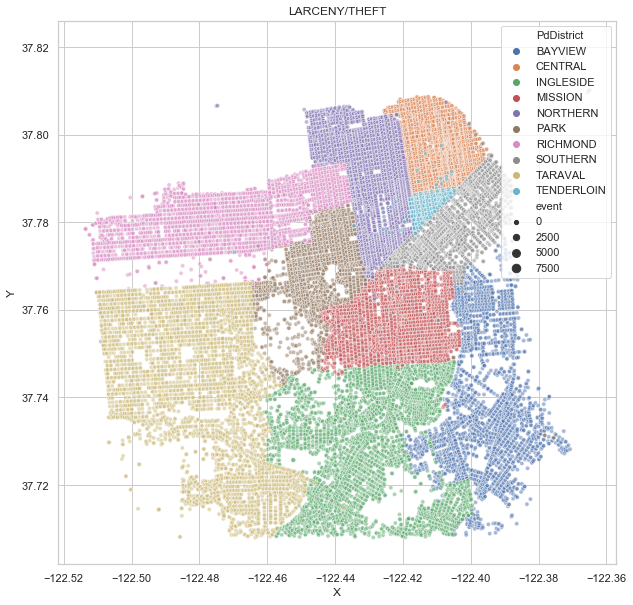

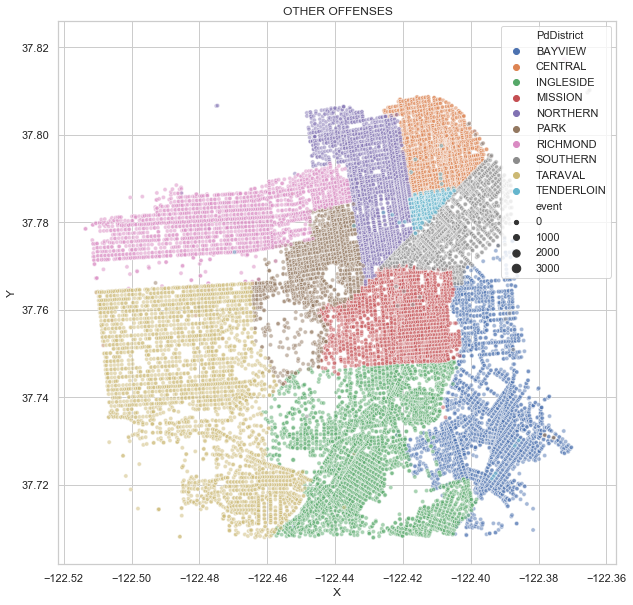

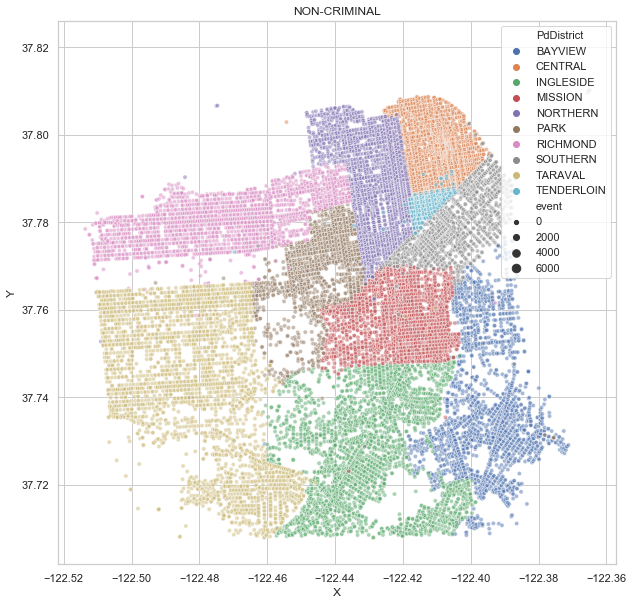

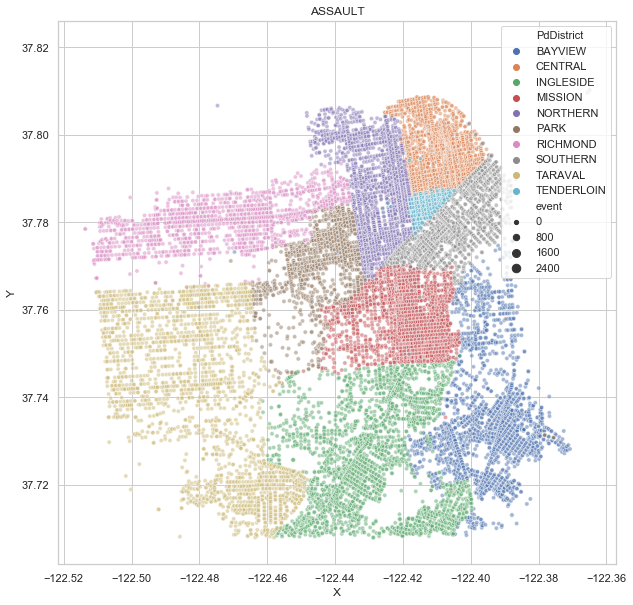

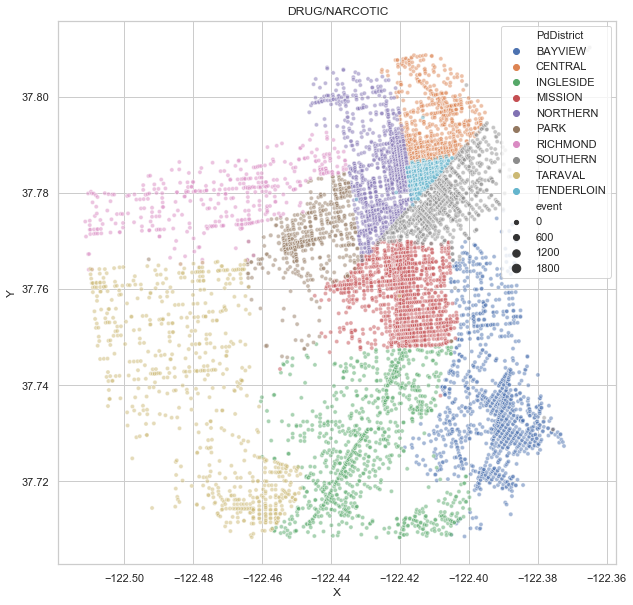

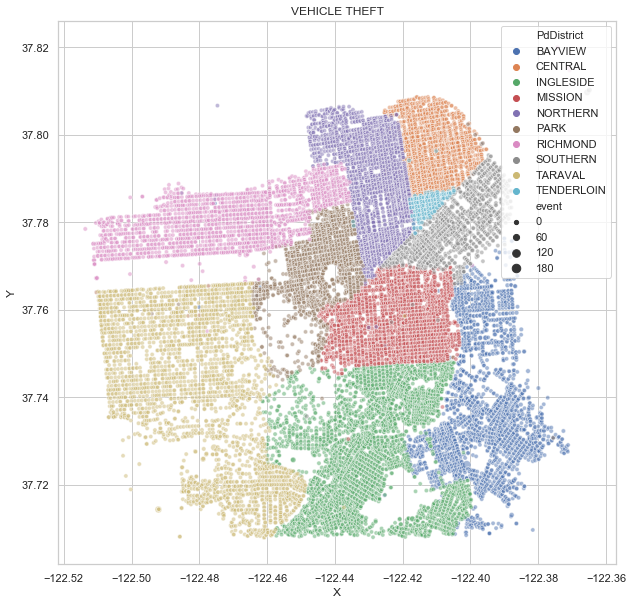

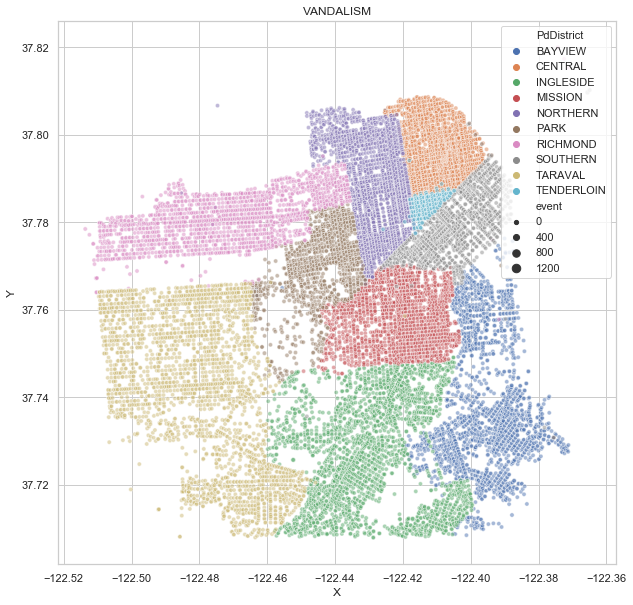

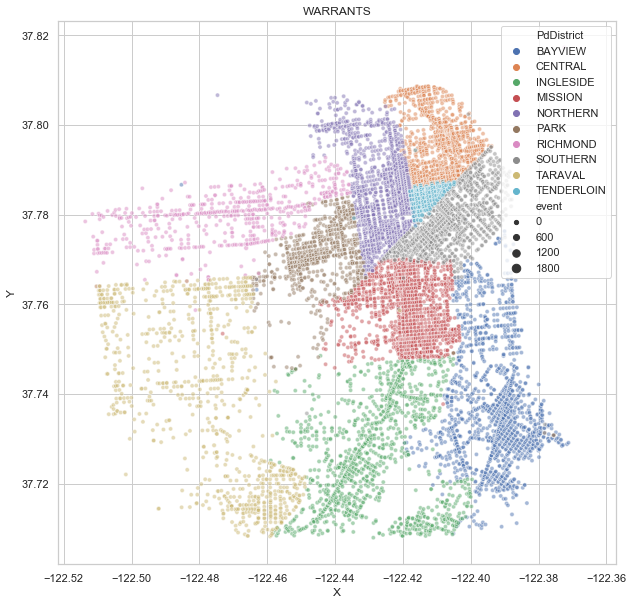

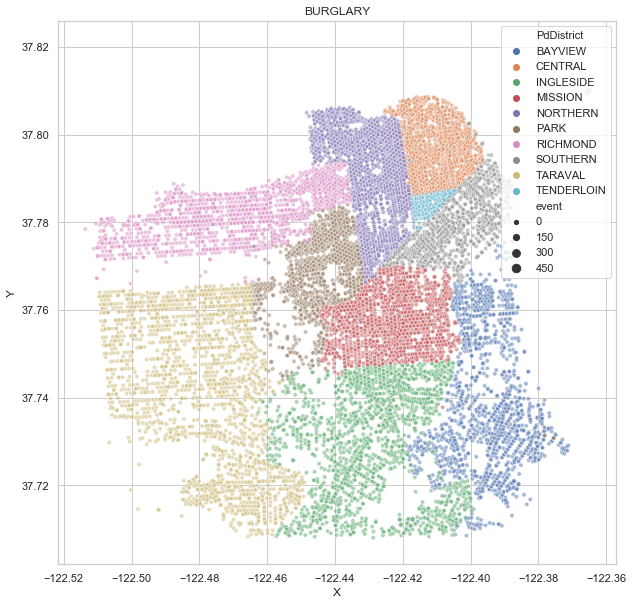

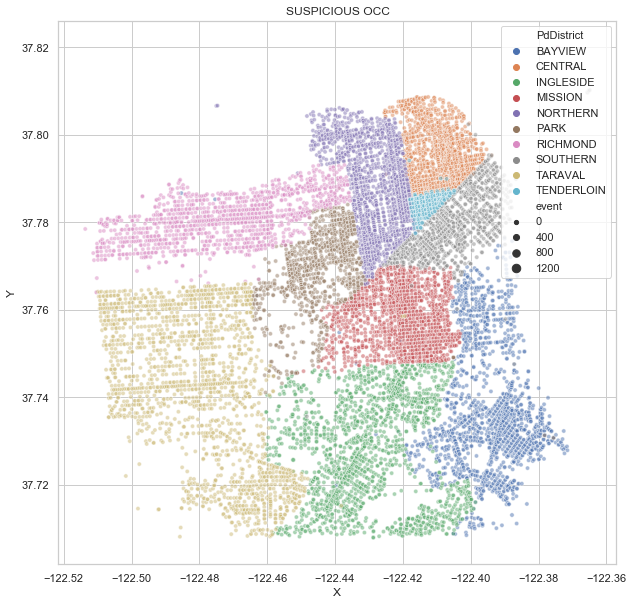

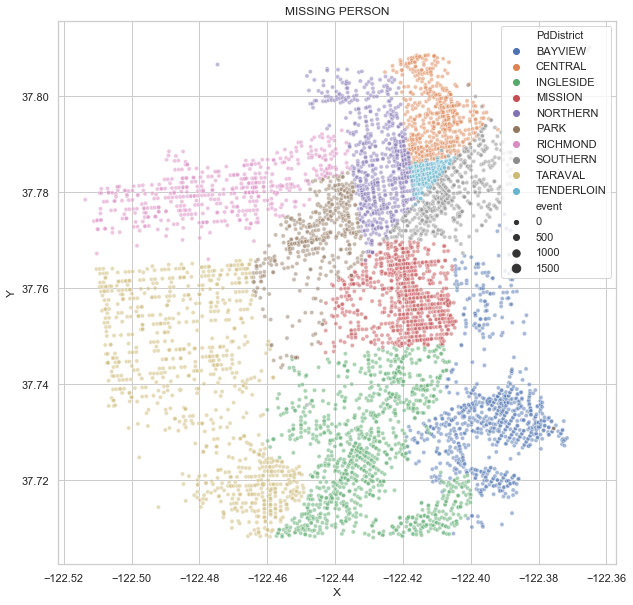

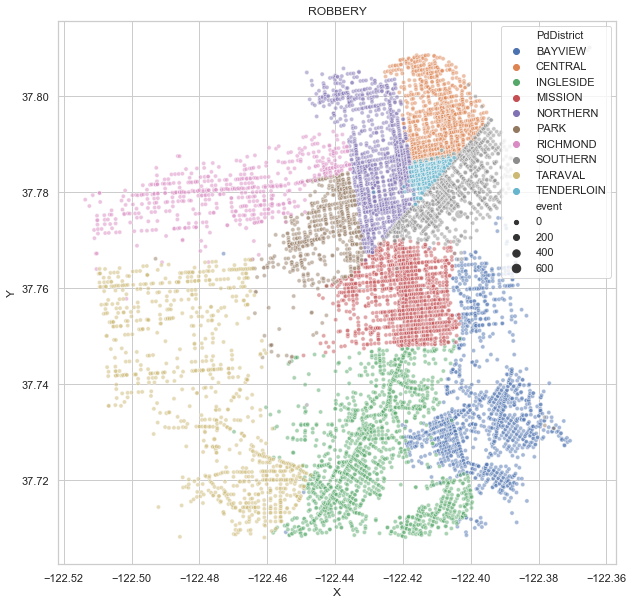

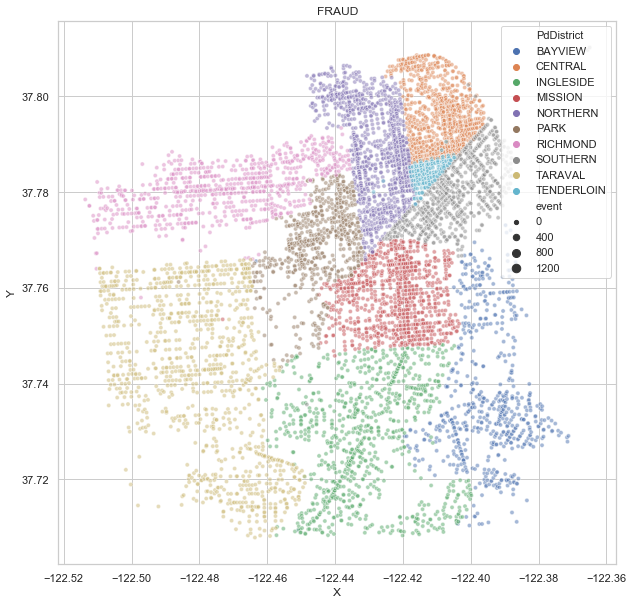

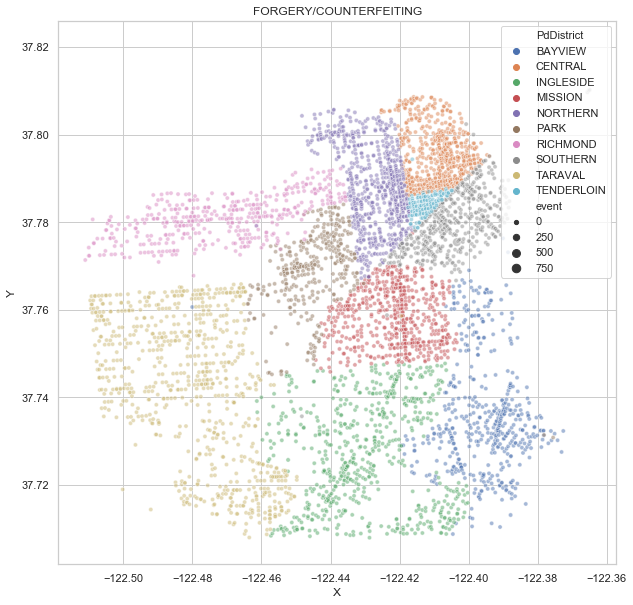

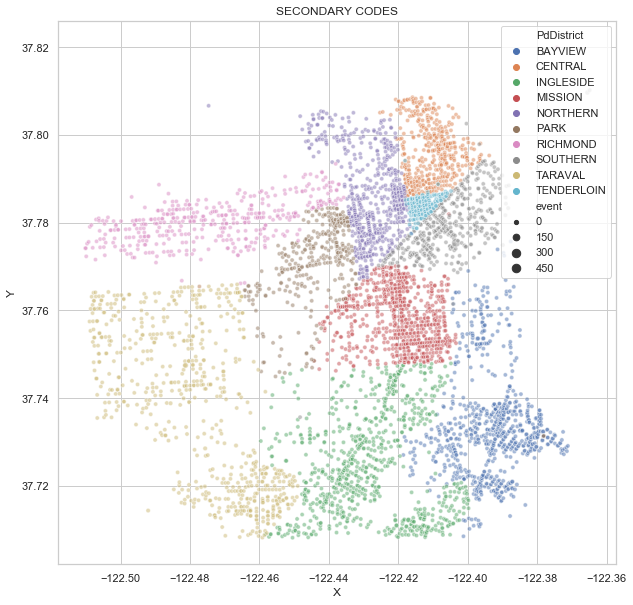

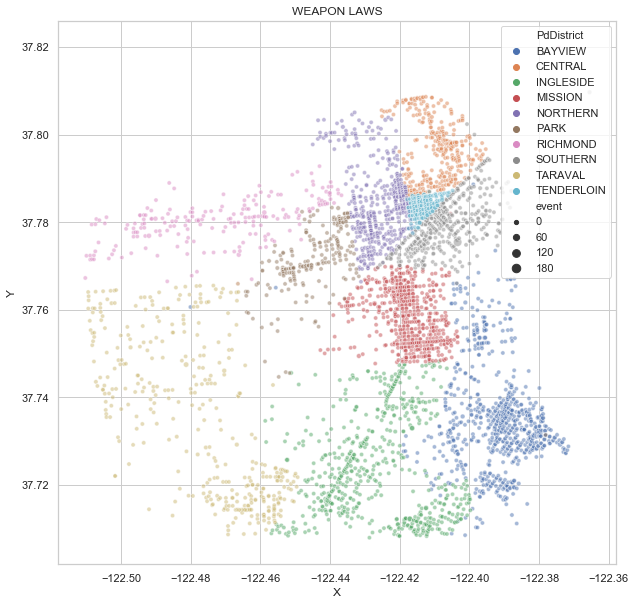

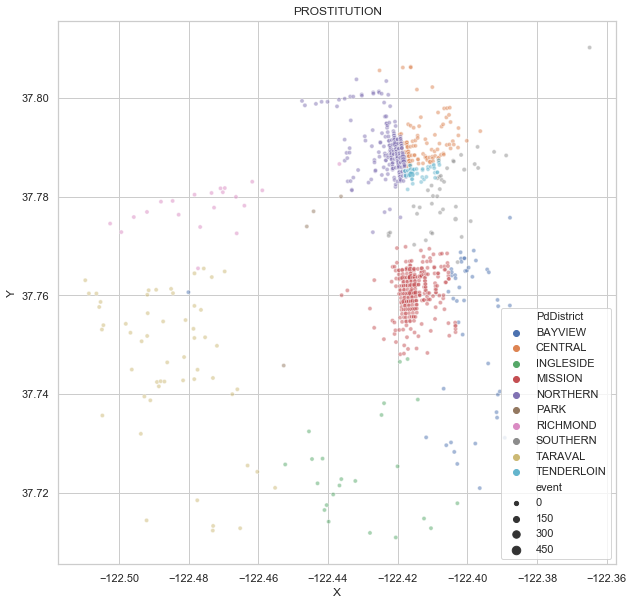

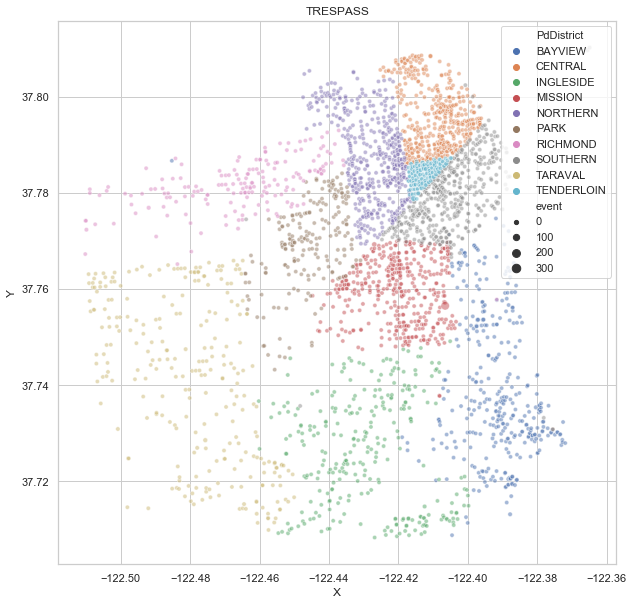

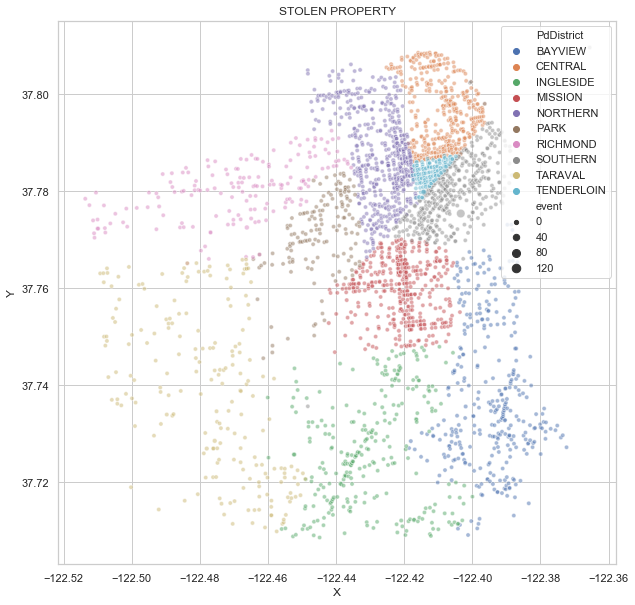

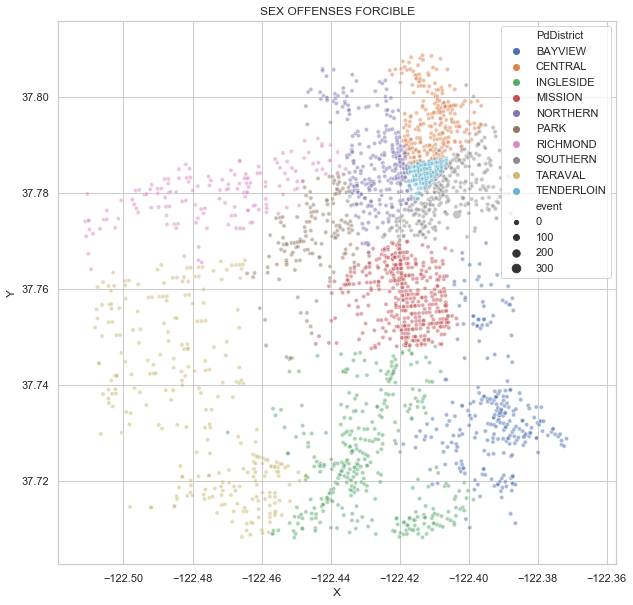

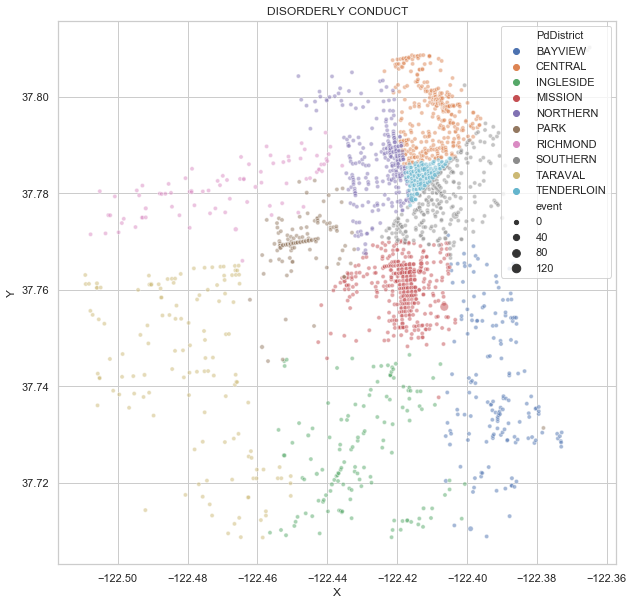

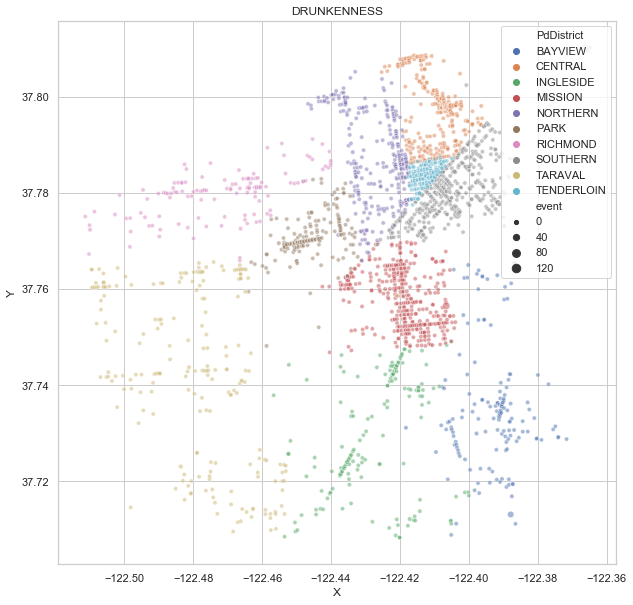

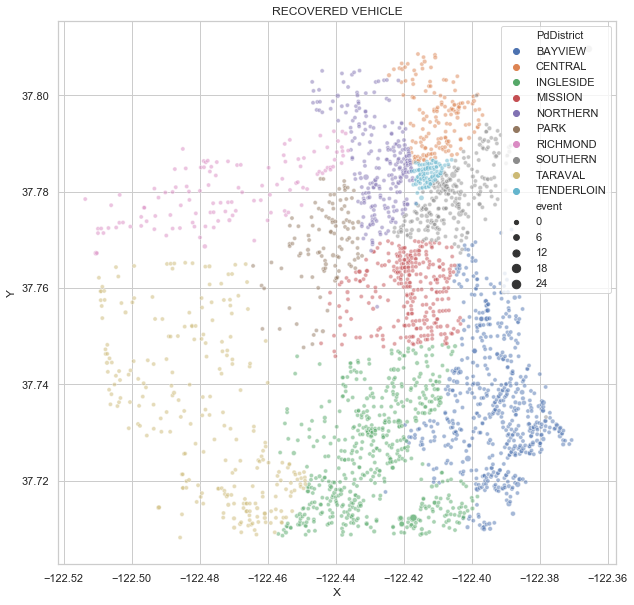

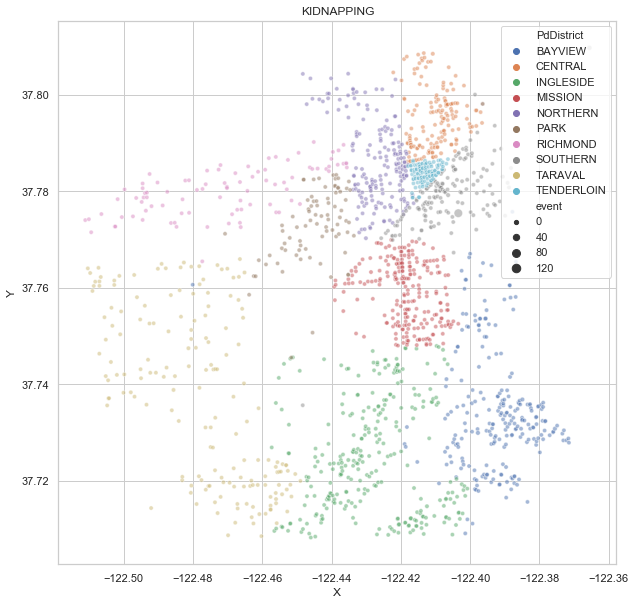

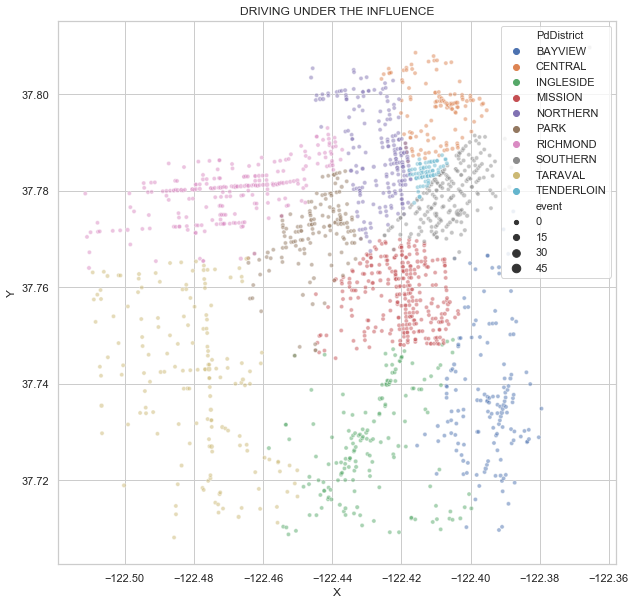

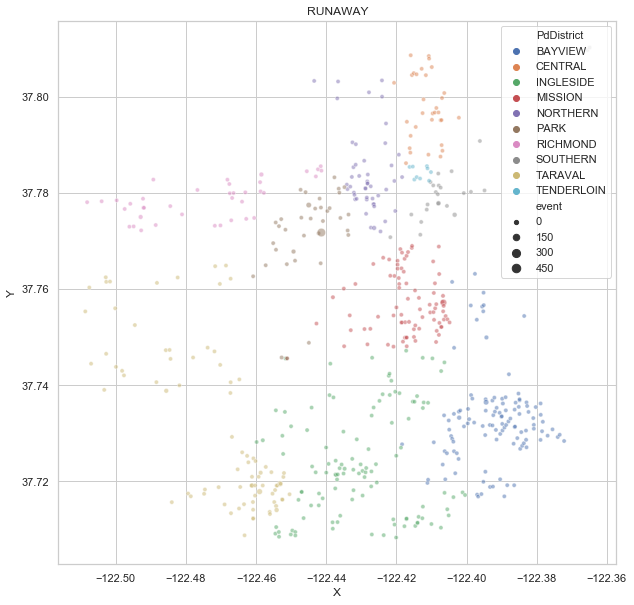

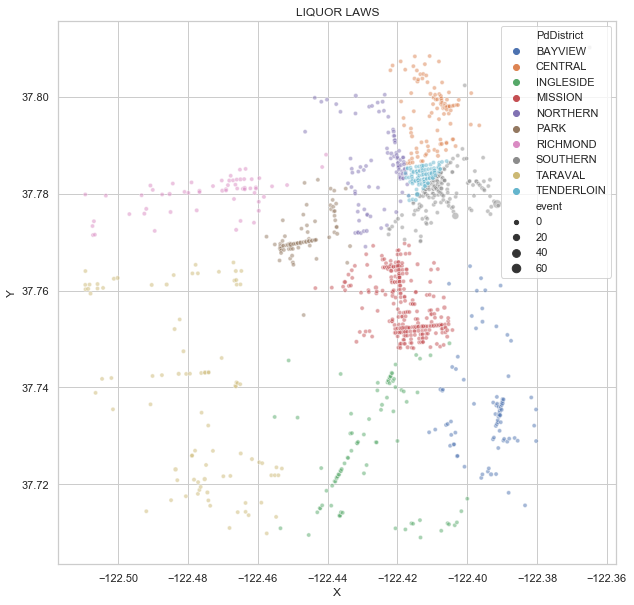

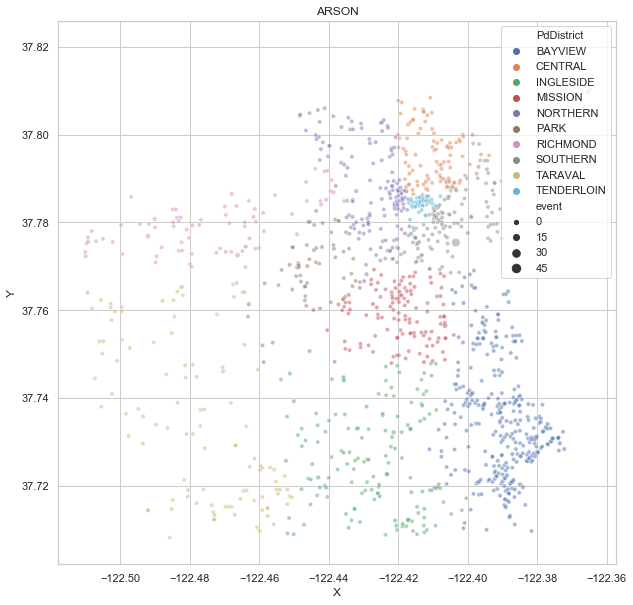

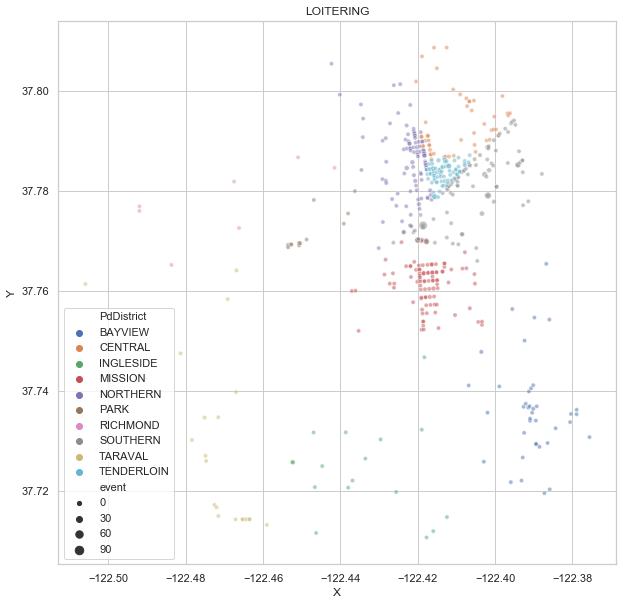

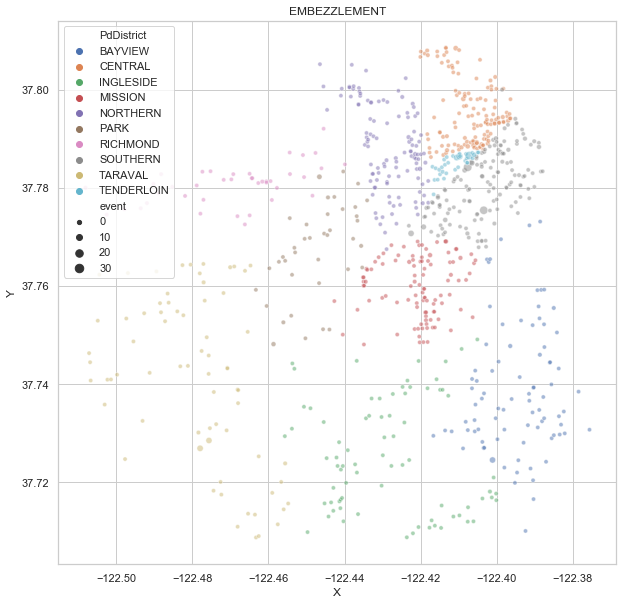

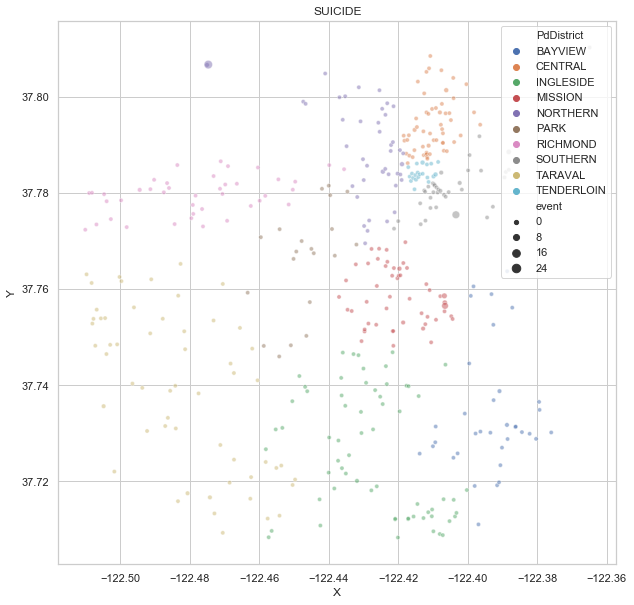

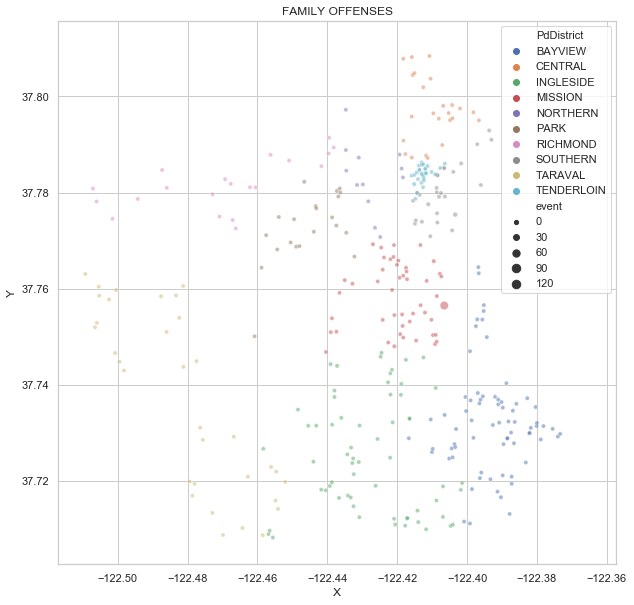

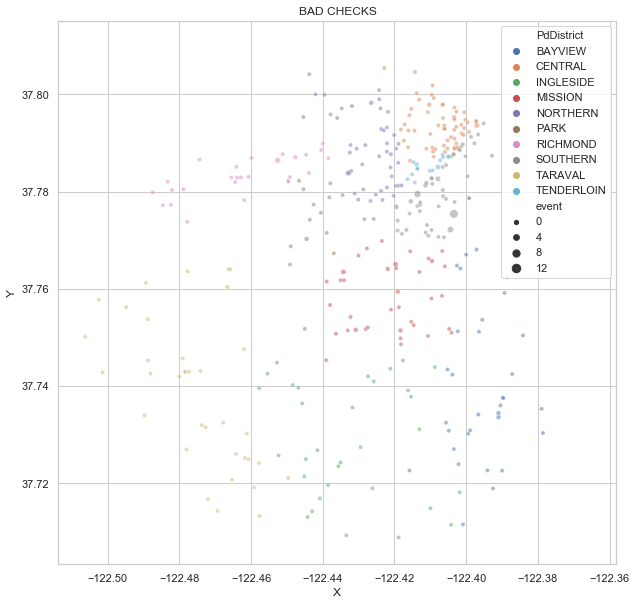

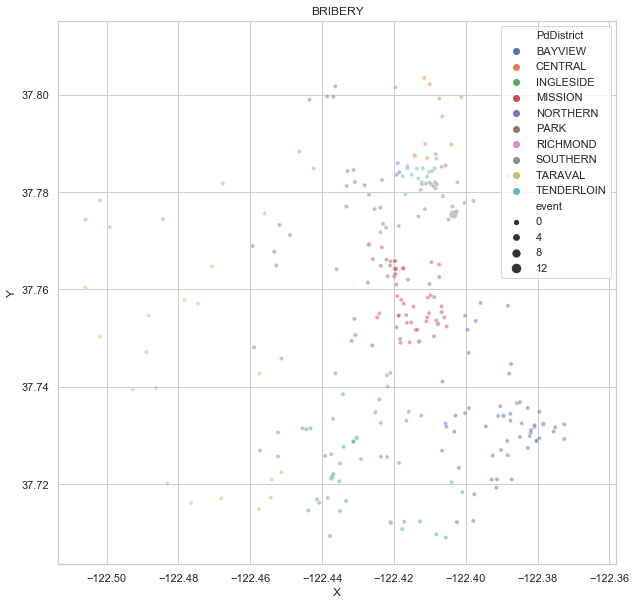

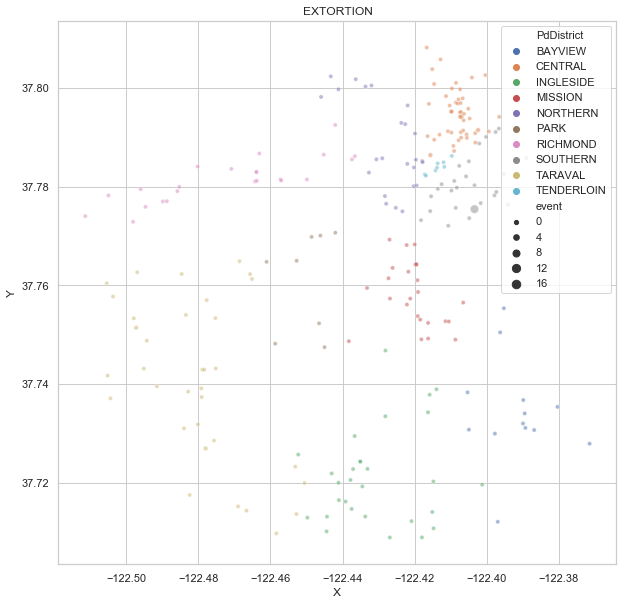

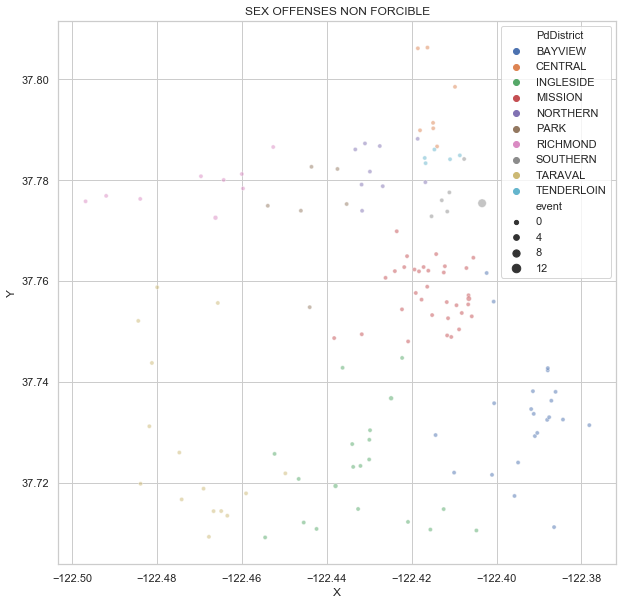

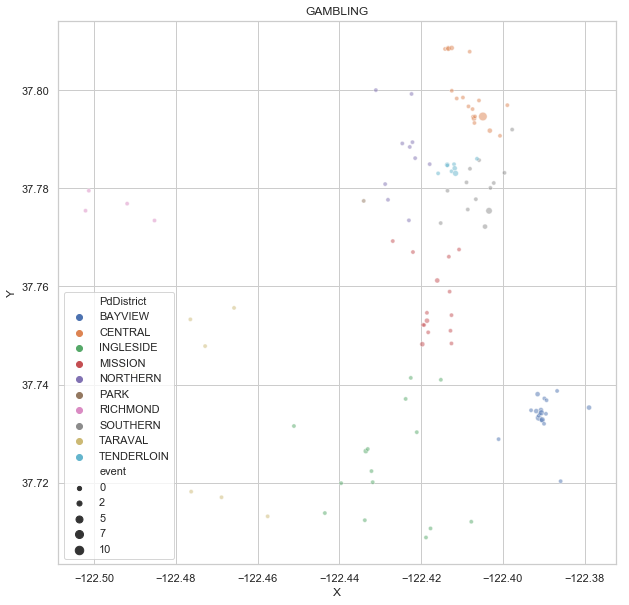

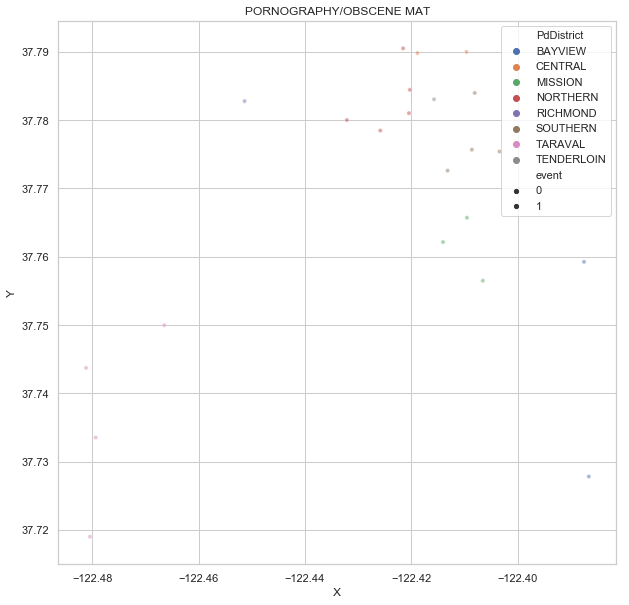

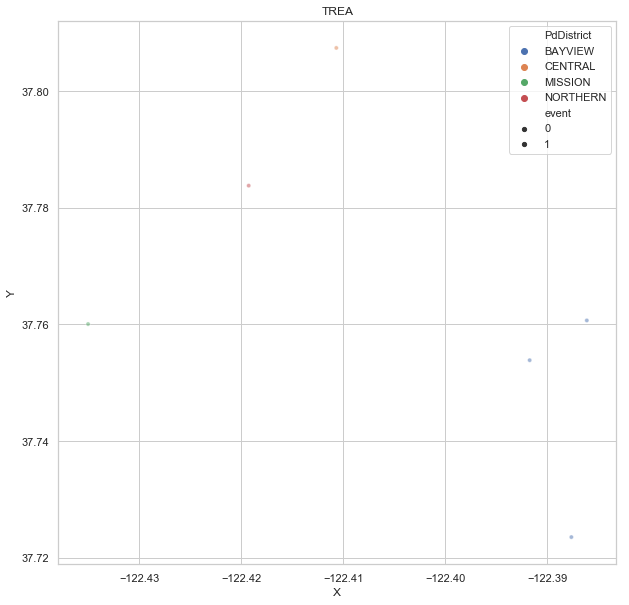

In [40]:
for i in most_crime.Category.unique():
    plt.figure(figsize=(10,10))
    plt.title(i)
    sns.scatterplot(x='X', y='Y', data=crime_pdDistrict[crime_pdDistrict['Category'] == i], hue='PdDistrict', size='event', alpha=0.5)
    plt.legend()

In [41]:
%whos

Variable           Type          Data/Info
------------------------------------------
a1                 str           OAK ST / LAGUNA ST
a2                 str           LAGUNA ST / OAK ST
crime              str           ARSON
crime_address      DataFrame                Category      <...>[153159 rows x 3 columns]
crime_pdDistrict   DataFrame                Category  PdDi<...>[217271 rows x 5 columns]
df                 DataFrame                           Cat<...>877982 rows x 14 columns]
df_test            DataFrame                 Id           <...>[884262 rows x 8 columns]
df_train           DataFrame                           Cat<...>[878049 rows x 9 columns]
i                  str           TREA
idx                Int64Index    Int64Index([660485, 66071<...>           dtype='int64')
most_crime         DataFrame                            Ca<...>             TREA       6
renewal_address    ndarray       260818: 260818 elems, type `<U44`, 45903968 bytes (43.777435302734375 Mb)
ren

In [42]:
del street_addr, street_addr2, a1, a2, crime, i, idx, result, result1, result2 

In [43]:
del renewal_address, renewals

In [44]:
import gc
gc.collect()

150823

In [60]:
df.tail()

Category DayOfWeek PdDistrict  \
877977                 ROBBERY    Monday    TARAVAL   
877978           LARCENY/THEFT    Monday  INGLESIDE   
877979           LARCENY/THEFT    Monday   SOUTHERN   
877980               VANDALISM    Monday   SOUTHERN   
877981  FORGERY/COUNTERFEITING    Monday    BAYVIEW   

                           Address           X          Y  year  month  hour  \
877977  CAPITOL AV / FARALLONES ST -122.459033  37.714056  2003      1     0   
877978        600 Block of EDNA ST -122.447364  37.731948  2003      1     0   
877979          5TH ST / FOLSOM ST -122.403390  37.780266  2003      1     0   
877980        2ND ST / TOWNSEND ST -122.390531  37.780607  2003      1     0   
877981    1800 Block of NEWCOMB AV -122.394926  37.738212  2003      1     0   

       addr  isStreet  IsInterection  event          addr2  
877977   ST         1              1      1  FARALLONES ST  
877978   ST         1              0      1        EDNA ST  
877979   ST         1              1      1      FOLSOM ST  
877980   ST         1              1      1    TOWNSEND ST  
877981   AV         0              0      1     NEWCOMB AV

##### Trea버린다.

In [47]:
idx = df[df.Category == 'TREA'].index
df.drop(index=idx, inplace=True)
df[df.Category == 'TREA']

Empty DataFrame
Columns: [Category, DayOfWeek, PdDistrict, Address, X, Y, year, month, hour, addr, isStreet, IsInterection, event, addr2]
Index: []

In [49]:
x1 = pd.get_dummies(df[['DayOfWeek','PdDistrict','year','month','hour']], columns=['DayOfWeek','PdDistrict','year','month','hour'], sparse=False)
x2 = df[['isStreet','IsInterection','X','Y']]
x = pd.concat([x1,x2], axis=1)
x.tail()

DayOfWeek_Friday  DayOfWeek_Monday  DayOfWeek_Saturday  \
877977                 0                 1                   0   
877978                 0                 1                   0   
877979                 0                 1                   0   
877980                 0                 1                   0   
877981                 0                 1                   0   

        DayOfWeek_Sunday  DayOfWeek_Thursday  DayOfWeek_Tuesday  \
877977                 0                   0                  0   
877978                 0                   0                  0   
877979                 0                   0                  0   
877980                 0                   0                  0   
877981                 0                   0                  0   

        DayOfWeek_Wednesday  PdDistrict_BAYVIEW  PdDistrict_CENTRAL  \
877977                    0                   0                   0   
877978                    0                   0                   0   
877979                    0                   0                   0   
877980                    0                   0                   0   
877981                    0                   1                   0   

        PdDistrict_INGLESIDE    ...      hour_18  hour_19  hour_20  hour_21  \
877977                     0    ...            0        0        0        0   
877978                     1    ...            0        0        0        0   
877979                     0    ...            0        0        0        0   
877980                     0    ...            0        0        0        0   
877981                     0    ...            0        0        0        0   

        hour_22  hour_23  isStreet  IsInterection           X          Y  
877977        0        0         1              1 -122.459033  37.714056  
877978        0        0         1              0 -122.447364  37.731948  
877979        0        0         1              1 -122.403390  37.780266  
877980        0        0         1              1 -122.390531  37.780607  
877981        0        0         0              0 -122.394926  37.738212  

[5 rows x 70 columns]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from imblearn.under_sampling import *
from imblearn.combine import *
from imblearn.over_sampling import *
import lightgbm as lgb
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [51]:
y0 = df['Category']

le = LabelEncoder().fit(y0)
y = le.transform(y0)

In [55]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=1)

##### model : Logistic Regression

In [56]:
model_logi = LogisticRegression(random_state=1).fit(x_train2, y_train2)

In [57]:
log_loss(y_test2, model_logi.predict_proba(x_test2))

2.5157880833363517

In [ ]:
# After RandomOverSampling
# model_logi2 = LogisticRegression(n_jobs=4).fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))


이건 너무 시간이 오래 걸림.

In [ ]:
# log_loss(y_test, model_logi2.predict_proba(x_test))

##### model : Bernoulli NB

In [45]:
np.random.seed(1)
model_bernNB = OneVsRestClassifier(BernoulliNB(),n_jobs=2).fit(x_train2, y_train2)

In [46]:
log_loss(y_test2, model_bernNB.predict_proba(x_test2))

2.525902395401517

In [ ]:
# After RandomOverSampling
model_bernNB = OneVsRestClassifier(BernoulliNB(),n_jobs=4).fit(x_train, y_train)

##### model : extraTree, RandomForest

In [50]:
model_extraTree = ExtraTreesClassifier(n_estimators=200, max_depth=8, bootstrap=True, random_state=1, n_jobs=4).fit(x_train2, y_train2)

In [51]:
log_loss(y_test2, model_extraTree.predict_proba(x_test2))

2.5635122842871403

In [58]:
model_randomForest = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=1, n_jobs=3, criterion='entropy').fit(x_train2, y_train2)

In [60]:
log_loss(y_test2, model_randomForest.predict_proba(x_test2))

2.497377793235836

In [65]:
model_randomForest2 = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=1, n_jobs=3, criterion='entropy').fit(x_train2, y_train2)

In [66]:
log_loss(y_test2, model_randomForest2.predict_proba(x_test2))

2.497037157294504

In [75]:
model_randomForest3 = RandomForestClassifier(n_estimators=400, max_depth=15, random_state=1, max_leaf_nodes=80 ,n_jobs=3).fit(x_train2, y_train2)

In [76]:
log_loss(y_test2, model_randomForest3.predict_proba(x_test2))

2.5108387557470078

##### model : LightGBM

In [30]:
model_lgb = lgb.LGBMClassifier(learning_rate=0.05,boosting_type='gbdt',max_depth=7, num_leaves=70, n_estimators=200, objective='multiclass', num_class=39).fit(x_train2, y_train2)

In [31]:
log_loss(y_test2, model_lgb.predict_proba(x_test2))

2.478788551011272

In [ ]:
model_lgb_180807 = lgb.LGBMClassifier(learning_rate=0.05,boosting_type='gbdt',max_depth=7, num_leaves=70, n_estimators=200, objective='multiclass', num_class=39).fit(x_train2, y_train2)

In [ ]:
log_loss(y_test, model_lgb_oversampling.predict_proba(x_test))

In [12]:
model_lgb1 = lgb.LGBMClassifier(learning_rate=0.07, boosting_type='gbdt', max_depth=8, num_leaves=70, n_estimators=250, objective='multiclass', random_state=0, num_class=39).fit(x_train2, y_train2)

In [13]:
log_loss(y_test2, model_lgb1.predict_proba(x_test2))

2.470312676041389

In [54]:
model_lgb2 = lgb.LGBMClassifier(learning_rate=0.05, boosting_type='gbdt', max_depth=5, num_leaves=80, n_estimators=250, objective='multiclass', random_state=1, num_class=39).fit(x_train2, y_train2)

In [55]:
log_loss(y_test2, model_lgb2.predict_proba(x_test2))

2.5005977326612854

In [80]:
model_lgbXY = lgb.LGBMClassifier(learning_rate=0.1, max_depth=6, num_leaves=70, n_estimators=200, objective='multiclass',
                                 random_state=1, num_class=38, n_jobs=3).fit(x_train2, y_train2)

In [81]:
log_loss(y_test2, model_lgbXY.predict_proba(x_test2))

2.3729208758454483

In [95]:
model_lgbXY2 = lgb.LGBMClassifier(learning_rate=0.1, max_depth=6, num_leaves=50, n_estimators=200, objective='multiclass',
                                 random_state=1, num_class=38, n_jobs=3).fit(x_train2, y_train2)

In [96]:
log_loss(y_test2, model_lgbXY2.predict_proba(x_test2))

2.371369920886394

In [103]:
model_lgbXY3 = lgb.LGBMClassifier(learning_rate=0.1, max_depth=8, num_leaves=50, n_estimators=200, objective='multiclass',
                                 random_state=1, num_class=38, n_jobs=3).fit(x_train2, y_train2)

In [104]:
log_loss(y_test2, model_lgbXY3.predict_proba(x_test2))

2.3672620525134587

In [109]:
model_lgbXY4 = lgb.LGBMClassifier(learning_rate=0.1, max_depth=8, num_leaves=50, n_estimators=200, objective='multiclass',
                                 random_state=1, num_class=38, n_jobs=3).fit(x_train2, y_train2)

In [110]:
log_loss(y_test2, model_lgbXY4.predict_proba(x_test2))

2.3706622209094275

In [78]:
len(set(y))

38

### test.csv에 적용

In [82]:
df_test['year'] = df_test['Dates'].map(lambda x: x.year)
df_test['month'] = df_test['Dates'].map(lambda x: x.month)
df_test['hour'] = df_test['Dates'].map(lambda x: x.hour)

In [83]:
df_test.drop(columns='Dates', inplace=True)
df_test.tail()

Id  DayOfWeek PdDistrict                      Address           X  \
884257  884257  Wednesday    MISSION      2600 Block of BRYANT ST -122.408983   
884258  884258  Wednesday   NORTHERN  1900 Block of WASHINGTON ST -122.425342   
884259  884259  Wednesday  INGLESIDE     5500 Block of MISSION ST -122.445418   
884260  884260  Wednesday    BAYVIEW      1500 Block of HUDSON AV -122.387394   
884261  884261  Wednesday    TARAVAL       1500 Block of SLOAT BL -122.489714   

                Y  event  year  month  hour  
884257  37.751987      1  2003      1     0  
884258  37.792681      1  2003      1     0  
884259  37.712075      1  2003      1     0  
884260  37.739479      1  2003      1     0  
884261  37.733950      1  2003      1     0

In [84]:
def street_addr(x):
    street=x.split(' ')
    return (' '.join(street[-1:]))

In [85]:
df_test['addr'] = df_test['Address'].apply(lambda x:street_addr(x))
df_test['addr'].tail()

884257    ST
884258    ST
884259    ST
884260    AV
884261    BL
Name: addr, dtype: object

In [86]:
df_test['isStreet'] = np.array([1 if value == 'ST' else 0 for value in df_test.addr.values])

In [87]:
df_test["IsInterection"] = df_test["Address"].apply(lambda x: 1 if "/" in x else 0)

In [88]:
df_test.tail()

Id  DayOfWeek PdDistrict                      Address           X  \
884257  884257  Wednesday    MISSION      2600 Block of BRYANT ST -122.408983   
884258  884258  Wednesday   NORTHERN  1900 Block of WASHINGTON ST -122.425342   
884259  884259  Wednesday  INGLESIDE     5500 Block of MISSION ST -122.445418   
884260  884260  Wednesday    BAYVIEW      1500 Block of HUDSON AV -122.387394   
884261  884261  Wednesday    TARAVAL       1500 Block of SLOAT BL -122.489714   

                Y  event  year  month  hour addr  isStreet  IsInterection  
884257  37.751987      1  2003      1     0   ST         1              0  
884258  37.792681      1  2003      1     0   ST         1              0  
884259  37.712075      1  2003      1     0   ST         1              0  
884260  37.739479      1  2003      1     0   AV         0              0  
884261  37.733950      1  2003      1     0   BL         0              0

In [89]:
x1 = pd.get_dummies(df_test[['DayOfWeek','PdDistrict','year','month','hour']], columns=['DayOfWeek','PdDistrict','year','month','hour'], sparse=False)
x2 = df_test[['isStreet','IsInterection','X','Y']]
x_test = pd.concat([x1,x2], axis=1)
x_test.tail()

DayOfWeek_Friday  DayOfWeek_Monday  DayOfWeek_Saturday  \
884257                 0                 0                   0   
884258                 0                 0                   0   
884259                 0                 0                   0   
884260                 0                 0                   0   
884261                 0                 0                   0   

        DayOfWeek_Sunday  DayOfWeek_Thursday  DayOfWeek_Tuesday  \
884257                 0                   0                  0   
884258                 0                   0                  0   
884259                 0                   0                  0   
884260                 0                   0                  0   
884261                 0                   0                  0   

        DayOfWeek_Wednesday  PdDistrict_BAYVIEW  PdDistrict_CENTRAL  \
884257                    1                   0                   0   
884258                    1                   0                   0   
884259                    1                   0                   0   
884260                    1                   1                   0   
884261                    1                   0                   0   

        PdDistrict_INGLESIDE    ...      hour_18  hour_19  hour_20  hour_21  \
884257                     0    ...            0        0        0        0   
884258                     0    ...            0        0        0        0   
884259                     1    ...            0        0        0        0   
884260                     0    ...            0        0        0        0   
884261                     0    ...            0        0        0        0   

        hour_22  hour_23  isStreet  IsInterection           X          Y  
884257        0        0         1              0 -122.408983  37.751987  
884258        0        0         1              0 -122.425342  37.792681  
884259        0        0         1              0 -122.445418  37.712075  
884260        0        0         0              0 -122.387394  37.739479  
884261        0        0         0              0 -122.489714  37.733950  

[5 rows x 70 columns]

In [111]:
pred = model_lgbXY3.predict_proba(x_test)

In [112]:
trea = np.zeros(len(x_test))
trea_df = pd.DataFrame(trea, columns=['TREA'])
trea_df

TREA
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
...      ...
884232   0.0
884233   0.0
884234   0.0
884235   0.0
884236   0.0
884237   0.0
884238   0.0
884239   0.0
884240   0.0
884241   0.0
884242   0.0
884243   0.0
884244   0.0
884245   0.0
884246   0.0
884247   0.0
884248   0.0
884249   0.0
884250   0.0
884251   0.0
884252   0.0
884253   0.0
884254   0.0
884255   0.0
884256   0.0
884257   0.0
884258   0.0
884259   0.0
884260   0.0
884261   0.0

[884262 rows x 1 columns]

In [113]:
id = df_test[['Id']]
df_prediction = pd.DataFrame(pred, columns=le.classes_)
result = pd.concat([id,df_prediction,trea_df], axis=1)

In [114]:
result.tail()

Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  \
884257  884257  0.001640  0.137353    0.002373  0.000287  0.047132   
884258  884258  0.001097  0.067254    0.005356  0.000031  0.109736   
884259  884259  0.001416  0.103128    0.001939  0.000122  0.044628   
884260  884260  0.004776  0.123347    0.001268  0.000221  0.038672   
884261  884261  0.001785  0.070790    0.000626  0.000084  0.038435   

        DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  \
884257            0.003553                     0.001829       0.030677   
884258            0.003097                     0.001001       0.016435   
884259            0.001557                     0.000773       0.032351   
884260            0.001998                     0.000242       0.025926   
884261            0.001547                     0.000782       0.013481   

        DRUNKENNESS  ...   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY  \
884257     0.009612  ...                    0.000340         0.005305   
884258     0.002154  ...                    0.000021         0.008532   
884259     0.002068  ...                    0.000179         0.004373   
884260     0.002041  ...                    0.000114         0.003569   
884261     0.002192  ...                    0.000024         0.002083   

         SUICIDE  SUSPICIOUS OCC  TRESPASS  VANDALISM  VEHICLE THEFT  \
884257  0.000375        0.057990  0.005869   0.064086       0.089083   
884258  0.000279        0.048865  0.009051   0.057277       0.102460   
884259  0.002867        0.037645  0.003730   0.066744       0.148356   
884260  0.000274        0.045463  0.003315   0.061296       0.098307   
884261  0.000557        0.053362  0.004164   0.068483       0.084367   

        WARRANTS  WEAPON LAWS  TREA  
884257  0.045783     0.010339   0.0  
884258  0.016121     0.003053   0.0  
884259  0.043163     0.011464   0.0  
884260  0.047014     0.059921   0.0  
884261  0.020617     0.011068   0.0  

[5 rows x 40 columns]

In [115]:
result.to_csv("LightGBM2.csv", index=False)